In [113]:
import random

In [114]:
solvers = ['Solver A', 'Solver B', 'Solver C', 'Solver D']

In [115]:
results = dict()
for i in range(len(solvers)):
    alpha = (1+i) * 2
    beta = 0.4
    results[solvers[i]] = dict()
    for j in range(1000):
        results[solvers[i]][str(j)] = random.betavariate(alpha, beta)

In [116]:
# generating random example timeline data
#p + ((generations_since_last_improvement * (1 / max_waiting_before_restart)) ** 4) * max_p
data = dict()
max_time = 1000
max_fitness = 1000
min_fitness = 100
n_experiments = 402
for n in range(n_experiments):
    c = 0
    for solver in solvers:
        alpha = (1+c) * 2
        beta = 0.4
        if c < 2:
            c+= 1
        if solver not in data:
            data[solver] = dict()
        time = max_time
        fitness = max_fitness
        entries = []
        i = 0
        j = 1/max_time
        while time > 0 and fitness > min_fitness:
            time *= 1.0-j - 0.1* random.random()
            fitness *= random.betavariate(alpha, beta)#1.0-j - 0.2* random.random()
            j+= ((i * (1 / max_time)) ** 4)
            i+=1
            entries.append((max_time-time, fitness))
        data[solver]['Instance'+str(n)] = entries
    results = dict()
    for solver in data:
        results[solver] = dict()
        for instance in data[solver]:
            results[solver][instance] = data[solver][instance][-1][1]

In [117]:
data

{'Solver A': {'Instance0': [(30.429239311207198, 109.36291081038165),
   (104.46412456075507, 105.63010715185452),
   (165.22405990573338, 92.87893326650595)],
  'Instance1': [(63.8655990393504, 954.1693414837208),
   (69.94558824143667, 850.5160605084277),
   (80.3169424507031, 824.7741681031118),
   (98.78515807425856, 811.9825310437324),
   (165.8254140040499, 809.0871989663049),
   (188.5051450878342, 807.8902204161693),
   (265.72347708185396, 787.5373338150456),
   (284.2246869311848, 787.2879203248516),
   (297.9049633387366, 709.0224480899404),
   (315.74745835982856, 708.9134683485746),
   (380.3472466314952, 702.8196679231102),
   (403.51031803207775, 495.90843803874935),
   (445.48816451670814, 363.8352767069453),
   (461.3997613597961, 362.32200332060717),
   (493.6143127052682, 91.01063096435871)],
  'Instance2': [(49.16014829191283, 971.5805972665147),
   (121.13802399218378, 948.3757708746158),
   (208.65303489195344, 916.5770043694963),
   (261.37975889939753, 911.72886

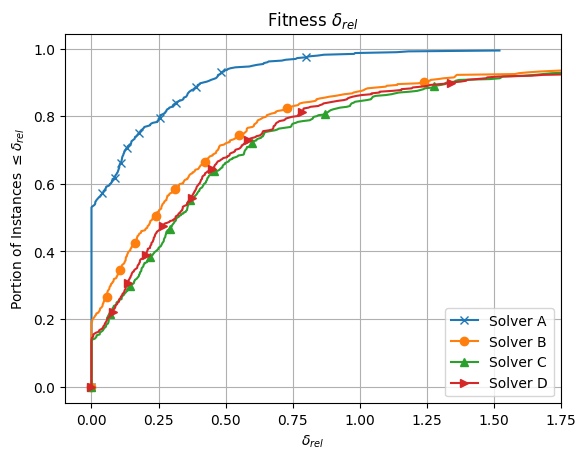

In [118]:
import util.visualization as vis
vis.visualize_gaps(results, n_instances=402)

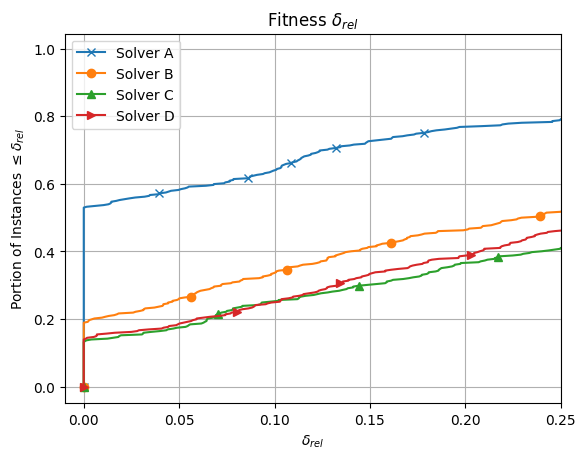

In [119]:
vis.visualize_gaps(results, x_lim_lb=-0.01, x_lim_ub=0.25, n_instances=402)

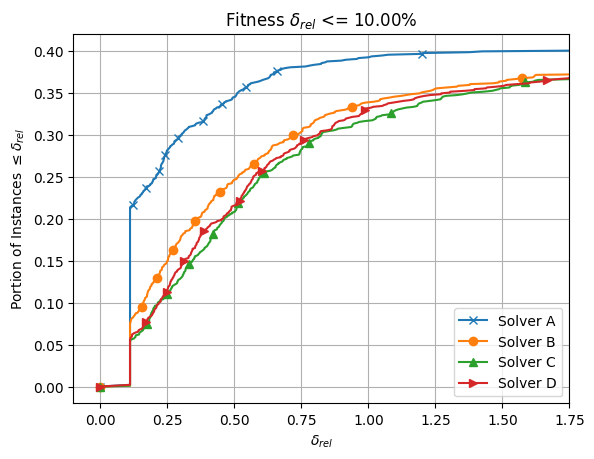

In [120]:
vis.visualize_gaps(results, delta_scope=0.9)

In [121]:
instance_data = dict()
example_instance = 'Instance1'
for solver in data:
    instance_data[solver] = data[solver][example_instance]

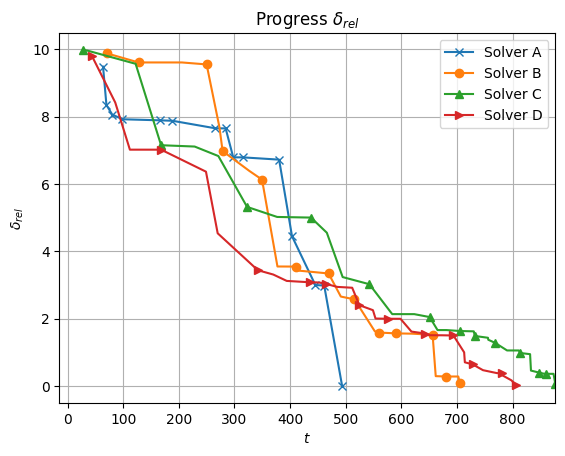

In [122]:
vis.visualize_timeline(instance_data)

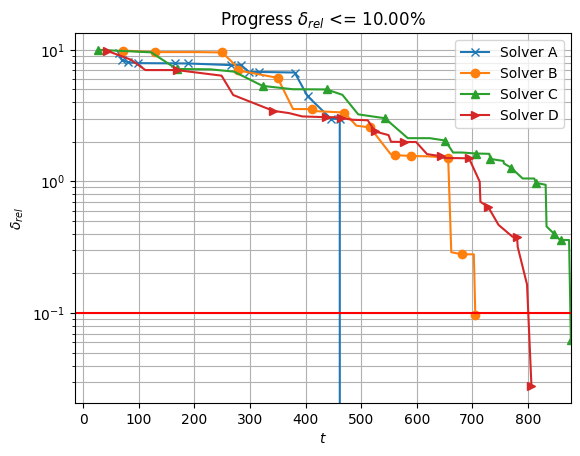

In [123]:
vis.visualize_timeline(instance_data, delta_scope=0.9)

In [124]:
from util.evaluation import minizinc_score
minizinc_data = dict()
for solver in data:
    minizinc_data[solver] = dict()
    for instance in data[solver]:
        minizinc_data[solver][instance] = data[solver][instance][-1]
score = minizinc_score(minizinc_data)

In [125]:
print(score)

{'Solver A': 866.0, 'Solver B': 590.0, 'Solver C': 460.0, 'Solver D': 496.0}


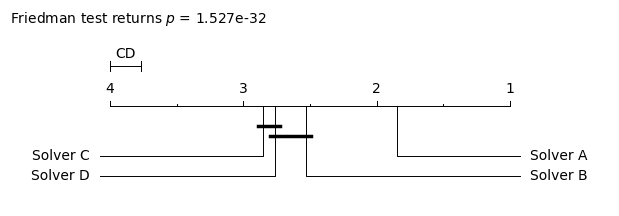

In [126]:
from util.visualization import rank_plot
rank_plot(data)

In [127]:
import pandas as pd

In [ ]:
# in this case, a csv file containing the final results for each instance of a problem is
df = pd.read_csv(r'<path to file>', header='infer', sep=';')
df.replace('inf', float('inf'))
df = df.drop('Instance', axis=1)

In [ ]:
# convert to python dict first to comply with the provided API
own_data = df.to_dict()

c:\Users\huda\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:2701: RuntimeWarning: invalid value encountered in subtract
  numer = (Ntot - k) * np.sum(Ni * (Zbari - Zbar)**2, axis=0)
c:\Users\huda\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:2706: RuntimeWarning: invalid value encountered in subtract
  dvar += np.sum((Zij[i] - Zbari[i])**2, axis=0)


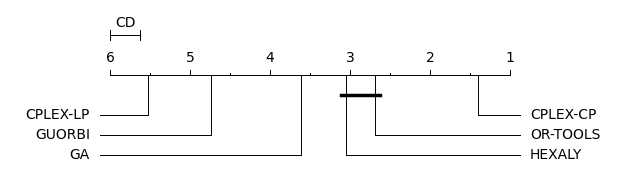

In [ ]:
# in case only the results are given instead of the histories as in the first case
rank_plot(own_data, alpha=0.05, ignore_time=True)